### Let's start by downloading an image

In [1]:
import requests
import shutil
file_name = "transform_image.png"
image_url = "https://www.hitc.com/static/uploads/2020/08/Screenshot_2020-09-07-Demon-Slayer-Kimetsu-no-Yaiba-OFFICIAL-PREVIEW.png"
r = requests.get(image_url, stream=True)
r.raw.decode_content = True
with open(file_name, 'wb') as f:
    shutil.copyfileobj(r.raw, f)

### Display the image

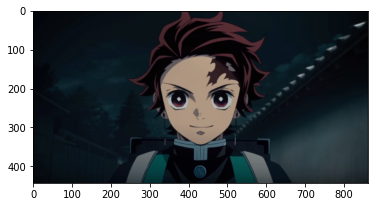

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

def display(img):
    plt.imshow(img)
    plt.show()
    plt.close()
#Load the image as BGR
img = cv2.imread('transform_image.png', 1)
#Convert BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
height, width, _ = img.shape
shape = (width, height)
display(img)

## Transformations
---
### Translation

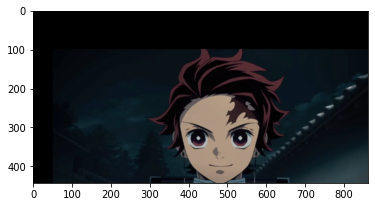

In [3]:
tx, ty = 50, 100
trans_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
borderArgs = {'borderMode': cv2.BORDER_CONSTANT, 'borderValue': (255, 255, 255)}
trans_img = cv2.warpAffine(img, trans_matrix, img.shape[1::-1])
display(trans_img)

### Rotation

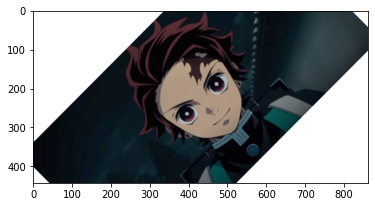

In [4]:
angle = 45
center = (width / 2, height / 2)
scale = 1
rot_matrix = cv2.getRotationMatrix2D(center, angle, scale)
rot_img = cv2.warpAffine(img, rot_matrix, shape, **borderArgs)
display(rot_img)

### Scaling

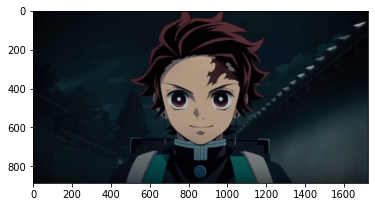

In [5]:
scaled_img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
#scaled_img = cv2.resize(img, (width // 2, height // 2), interpolation=cv2.INTER_CUBIC)
display(scaled_img)

### Affine Warp

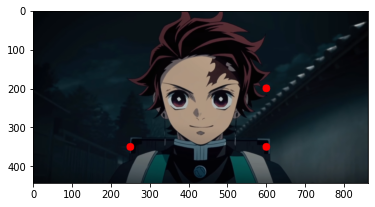

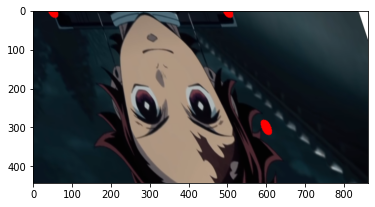

In [6]:
pts1 = np.float32([[250, 350], [600, 350], [600, 200]])
pts2 = np.float32([[50, 0], [500, 0], [600, 300]])
img_copy = img.copy()
#Draw circles at each point
for c in pts1:
    img_copy = cv2.circle(img_copy, tuple(map(int, c)), 10, (255, 0, 0), -1)
display(img_copy)
aff_matrix = cv2.getAffineTransform(pts1, pts2)
aff_img = cv2.warpAffine(img_copy, aff_matrix, shape, **borderArgs)
display(aff_img)

### Perspective

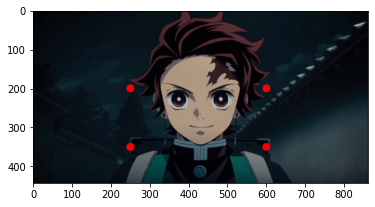

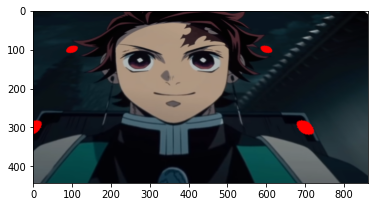

In [7]:
pts1 = np.float32([[250, 350], [600, 350], [600, 200], [250, 200]])
pts2 = np.float32([[0, 300], [700, 300], [600, 100], [100, 100]])
img_copy = img.copy()
#Draw circles at each point
for c in pts1:
    img_copy = cv2.circle(img_copy, tuple(map(int, c)), 10, (255, 0, 0), -1)
display(img_copy)
perspec_matrix = cv2.getPerspectiveTransform(pts1, pts2)
perspec_img = cv2.warpPerspective(img_copy, perspec_matrix, shape, **borderArgs)
display(perspec_img)